# Creamos el cuaderno para el clasificador

# Importamos las Librerias necesarias

In [ ]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

#Importamos los datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/momentos_data
%ls

/content/drive/My Drive/Colab Notebooks/momentos_data
csv_test.csv  csv_train.csv


In [ ]:
df_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/momentos_data/csv_train.csv', sep = ',')
df_train.head()

,momento1,momento2,momento3,momento4,momento5,momento6,momento7,poligono
0,0.160387,6.788900e-07,1.027370e-07,2.281560e-10,7.025530e-19,1.592460e-13,8.524030e-19,Hexagon
1,0.160402,1.009730e-06,7.079730e-07,1.233970e-09,7.661080e-18,-1.237850e-12,-3.565890e-17,Hexagon
2,0.160385,2.893700e-07,7.408430e-10,4.880910e-12,2.574750e-22,1.642550e-15,-1.408940e-22,Hexagon
3,0.160369,3.371730e-08,2.747770e-09,1.107550e-12,-3.703780e-23,2.522020e-17,4.859290e-23,Hexagon
4,0.160386,1.737890e-07,1.759000e-09,3.788780e-11,9.328160e-21,1.280510e-14,-2.941630e-21,Hexagon


In [ ]:
df_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/momentos_data/csv_test.csv', sep = ',')
df_test.head()

,momento1,momento2,momento3,momento4,momento5,momento6,momento7,poligono
0,0.160387,6.788900e-07,1.027370e-07,2.281560e-10,7.025530e-19,1.592460e-13,8.524030e-19,Hexagon
1,0.160402,1.009730e-06,7.079730e-07,1.233970e-09,7.661080e-18,-1.237850e-12,-3.565890e-17,Hexagon
2,0.160385,2.893700e-07,7.408430e-10,4.880910e-12,2.574750e-22,1.642550e-15,-1.408940e-22,Hexagon
3,0.160369,3.371730e-08,2.747770e-09,1.107550e-12,-3.703780e-23,2.522020e-17,4.859290e-23,Hexagon
4,0.160345,1.105650e-07,5.112940e-10,6.448440e-11,4.297160e-21,-1.582600e-15,-1.089190e-20,Hexagon


# Se separan los datos para ser usados después en la máquina de soporte vectorial

In [ ]:
x_train = df_train.iloc[:,0:-1]
x_train
y_train = df_train.iloc[:,-1]
y_train

0      Hexagon
1      Hexagon
2      Hexagon
3      Hexagon
4      Hexagon
        ...   
995       Star
996       Star
997       Star
998       Star
999       Star
Name: poligono, Length: 1000, dtype: object

In [ ]:
x_test = df_test.iloc[:,0:-1]
x_test
y_test = df_test.iloc[:,-1]
y_test

0      Hexagon
1      Hexagon
2      Hexagon
3      Hexagon
4      Hexagon
        ...   
695       Star
696       Star
697       Star
698       Star
699       Star
Name: poligono, Length: 700, dtype: object

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1000, 7)
(1000,)
(700, 7)
(700,)


# Instamaciamos la SVM

In [ ]:
param_grid={'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001,0.001],'kernel':['rbf','poly', 'linear', 'sigmoid']}
svc=svm.SVC(probability=True)
model=GridSearchCV(svc,param_grid, n_jobs=-1, verbose = 1, cv=5)

In [ ]:
model.fit(x_train, y_train)
print('The Model is trained well with the given images')

Fitting 5 folds for each of 80 candidates, totalling 400 fits
The Model is trained well with the given images


# Evaluamos y obtenemos los resultados

In [ ]:
from sklearn import metrics
y_pred = model.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6528571428571428


In [ ]:
model.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

Confusion_matrix:


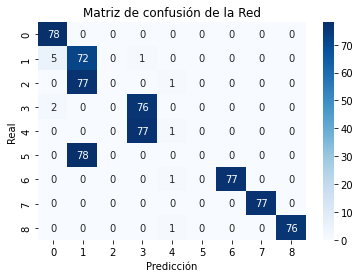

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn import metrics 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score



# MAE=metrics.mean_absolute_error(y_test, y_pred)
# MSE=metrics.mean_squared_error(y_test, y_pred)
# RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
accuracy=str(accuracy_score(y_test, y_pred))

# MAE=str(round(MAE, 4))
# MSE=str(round(MSE, 4))
# RMSE=str(round(RMSE, 4))

print('Confusion_matrix:')
y_test_transformado = y_test
y_pred_transformado = y_pred

cm = confusion_matrix(y_test_transformado, y_pred_transformado)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt='g'); #annot=True to annotate cells
ax.set_xlabel('Predicción');ax.set_ylabel('Real'); 
ax.set_title('Matriz de confusión de la Red'); 

In [ ]:
precision=precision_score(y_test, y_pred, average='micro')
precision=str(round(precision, 4))
recall=recall_score(y_test, y_pred, average='micro')
recall=str(round(recall, 4))
f1=f1_score(y_test, y_pred, average='micro')
f1=str(round(f1, 4))


In [ ]:
colums = ['Accuracy', 'Precision', 'Recall', 'F1']
vals = {'Accuracy': 0.6528571428571428, 'Precision':0.6529, 'Recall':0.6529, 'F1':0.6529}
df_metrics = pd.DataFrame(columns=colums)
df_metrics = df_metrics.append(vals, ignore_index=True)
df_metrics

,Accuracy,Precision,Recall,F1
0,0.652857,0.6529,0.6529,0.6529
